/tmp/ipykernel_3558/1881516703.py:20: RuntimeWarning: invalid value encountered in power
  return (x/2)**(2/3) - (np.sin(0.5*y))**(2/3) - (np.cos(0.5*y))**(2/3)


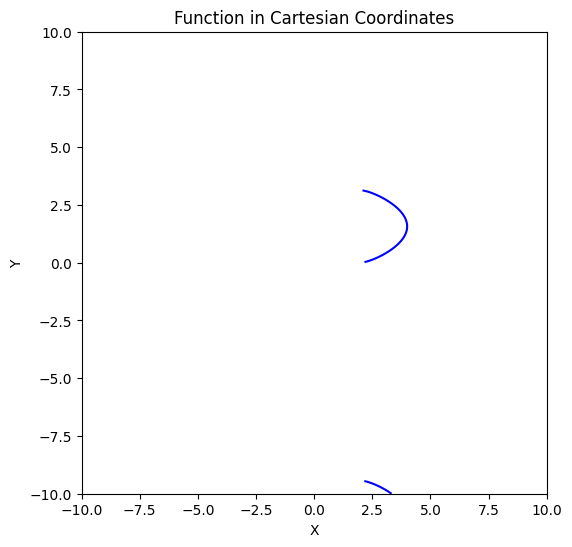

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def plot_implicit(equation, x_range=(-10, 10), y_range=(-10, 10), num_points=400):
    x_vals = np.linspace(x_range[0], x_range[1], num_points)
    y_vals = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = equation(X, Y)
    
    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, Z, levels=[0], colors='blue')
    plt.title("Function in Cartesian Coordinates")
    plt.xlabel("X")
    plt.ylabel("Y")
    # plt.savefig(f"./plots/{potential_type}_plots/function_plot.png")
    plt.show()
    
# Example usage
def implicit_function(x, y):
    return (x/2)**(2/3) - (np.sin(0.5*y))**(2/3) - (np.cos(0.5*y))**(2/3) 

plot_implicit(implicit_function, x_range=(-10, 10), y_range=(-10, 10))


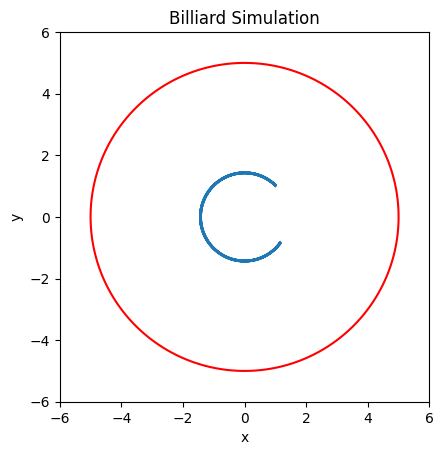

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Boundary function (example: Circle)
# You can replace this with any function of the boundary
def boundary_func(x, y):
    return x**2 + y**2 - 25  # Circle with radius 5 (x^2 + y^2 = 25)

# Gradient of the boundary function (used for reflection)
def gradient(x, y):
    dx = 2 * x
    dy = 2 * y
    return np.array([dx, dy])

# Normalize a vector
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

# Reflect the velocity vector based on the normal vector
def reflect_velocity(vx, vy, x, y):
    normal = gradient(x, y)
    normal = normalize(normal)  # Normalize the normal vector
    velocity = np.array([vx, vy])
    reflection = velocity - 2 * np.dot(velocity, normal) * normal
    return reflection[0], reflection[1]

# Time step and simulation settings
dt = 0.01
time_steps = 1000
x, y = 1, 1  # Initial position
vx, vy = 2, 3  # Initial velocity

# Plot setup
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
ax.set_title('Billiard Simulation')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Plot the boundary (optional visualization)
x_vals_boundary = np.linspace(-6, 6, 400)
y_vals_boundary = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_vals_boundary, y_vals_boundary)
Z = boundary_func(X, Y)
ax.contour(X, Y, Z, levels=[0], colors='red')  # Red contour for the boundary

# Simulation loop
x_vals, y_vals = [x], [y]
for _ in range(time_steps):
    # Move the ball
    x += vx * dt
    y += vy * dt
    
    # Check if the ball hits the boundary
    if boundary_func(x, y) <= 0:  # The ball has hit the boundary (inside or on it)
        vx, vy = reflect_velocity(vx, vy, x, y)
    
    x_vals.append(x)
    y_vals.append(y)

# Plot the trajectory
ax.plot(x_vals, y_vals, label="Ball Trajectory")
plt.show()
